# Table of Contents

- A detailed discussion about entrophy
1. understanding from Chinese/English character
2. conditional entrophy
- Algorithms
1. ID3
2. C4.5
3. CART
- Something else
1. Bagging
2. Random forest
3. Stacking

## Part 1 Entrophy

**Entrophy** measures the uncertainty of a variable. The larger the entrophy is, the higher level the uncertainty is. Entrophy can be represented as the formula:
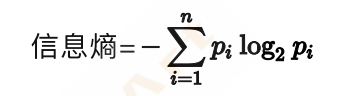
Where **pi** refers to probability of the variable be i for the variable.

Note: according to this formula, when there is only one class, pi = 1, entrophy equals to 0.

### 1. Understanding from Chinese/English character

For detailed reading please refer to 3_决策树.pdf. Here are few interesting points:
1. The higher entrophy is, more information each character is carrying. Thus deleting/lossing one character is more likely to make the string unreadable. This is why lossing one character in Chinese will more likely to change the meaning of a sentence while lossing one character of English letter is fine. (English letter usually come with some combination, which is fixed so less entrophy)

2. 单个汉字的信息熵是9.56。⽽⼀般认为单个英⽂字⺟的信息熵为3.9

3. Math formulas have the largest entrophy.

4. Entrophy can also be seen as length of bitcode required to huffman encode all characters

### 2. Conditional Entrophy

Entrophy is: 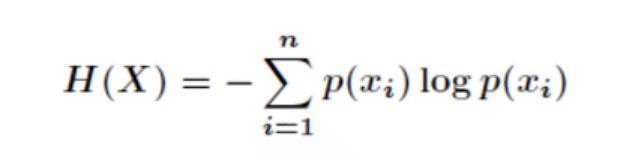

And Conditional entrophy is 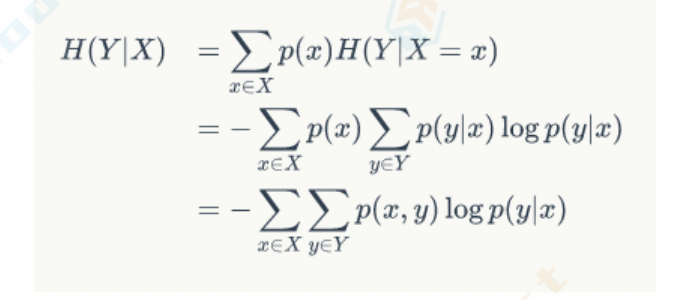 please note that this means classify all y by x, and calculate entrophy by each of them, and then weighted back by propotion of x.

### Information gain

Information gain of y based on x is:
1. The extra information we can get about y given x.
2. The difference between entrophy of y and conditional entrophy of y given x.
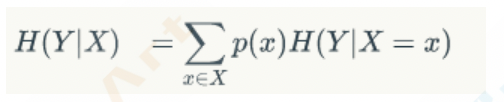

In decision tree, the idea is to constantly seeking the feature with maximum information gain.

## Part 2 Decision Tree algorithms

### 1. ID3

This is the most basic one and the idea is to constantly seeking the feature with maximum information gain based on entrophy difference. (⽤计算出的信息增益最⼤的特征来建⽴决策树的当前节点)

算法的过程为:
1.初始化信息增益的阈值𝜖ϵ
2.判断样本是否为同⼀类输出𝐷𝑖，如果是则返回单节点树T。标记类别为𝐷𝑖
3.判断特征是否为空，如果是则返回单节点树T，标记类别为样本中输出类别D实例数最多的类别。
4.计算A中的各个特征（⼀共n个）对输出D的信息增益，选择信息增益最⼤的特征𝐴�
5.如果𝐴𝑔的信息增益⼩于阈值𝜖ϵ，则返回单节点树T，标记类别为样本中输出类别D实例数最多的类别。
6.否则，按特征𝐴𝑔的不同取值𝐴𝑔𝑖将对应的样本输出D分成不同的类别𝐷𝑖。每个类别产⽣⼀个⼦节点。对应特征值为𝐴𝑔𝑖。返回增加了节点的数T。
7.对于所有的⼦节点，令 D = Di, A = A - {Ag}递归调⽤2-6步，得到⼦树𝑇𝑖并返回。

Key features:
1. Things that can stop tree grow any more include: **no more feature**, **class is pure**, **max information gain less than threshold**
2. Features used will not be used again

Cons:
1. ID3没有考虑连续特征
2. ID3采⽤信息增益⼤的特征优先建⽴决策树的节点。很快就被⼈发现，在相同条件下，取值⽐较多的特征⽐取值少的特征信息增益⼤。
3. ID3算法对于缺失值的情况没有做考虑
4. 没有考虑过拟合的问题

### 2. C4.5

C4.5 is an algorithm which solved cons of ID3.

**ID3 cannot address continuous variable**
C4.5 will take sort all continuous values, then break point is (xi+xi+1)/2 for each x, and choose the one with maximum information gain (since different division point --> different division --> different entrophy)

**ID3 biased to features with more categories**
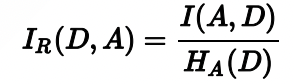

I(A,D) is information gain and Ha(D) is entrophy of feature itself. Thus feature with more categories --> higher Ha(D) --> not that biased.

**ID3 ignore missing value issues**

1. To choose between features for decisions while some of them have missing values, calculate entrophy based on data entry with value, 最后乘上⼀个系数，这个系数是⽆特征A缺失的样本加权后所占加权总样本的⽐例。

2. When using tree for decision/further work. 可以将缺失特征的样本同时划分⼊所有的⼦节点，不过将该样本的权重按各个⼦节点样本的数量⽐例来分配。

Cons:

1. 决策树算法⾮常容易过拟合，因此对于⽣成的决策树必须要进⾏剪枝。
2. C4.5⽣成的是多叉树，即⼀个⽗节点可以有多个节点。很多时候，在计算机中⼆叉树模型会⽐多叉树运算效率⾼。如果采⽤⼆叉树，可以提⾼效率。
3. C4.5只能⽤于分类，如果能将决策树⽤于回归的话可以扩⼤它的使⽤范围。
4. C4.5由于使⽤了熵模型，⾥⾯有⼤量的耗时的对数运算,如果是连续值还有⼤量的排序运算。如果能够加以模型简化可以减少运算强度但⼜不牺牲太多准确性的话，那就更好了。

### 3. Gini

As mentioned above, log computation which is largely used in entrophy above, is very computation heavy. Thus it is important to introduce Gini which is much easier to compute:
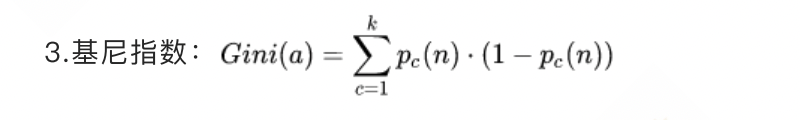 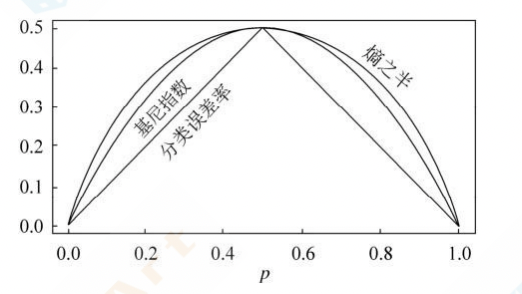

1. 基尼系数越⼩，则不纯度越低，特征越好。
---
2. For each sub propotion k:
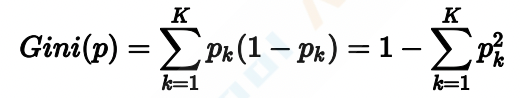
---
3. For binary
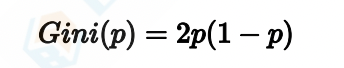
---
4. This can also be represented by total amount D and category amount Ck
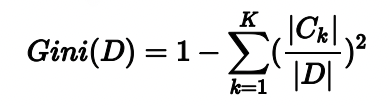
---
5. If the sample is distributed to two categories, then the conditional gini is
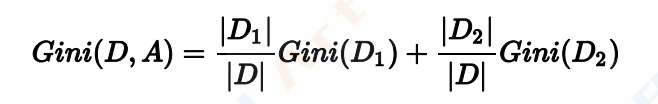

### 4. CART Tree

Based on C4.5 Here are some variations:

1. It use Gini to check which division point is best for continuous value. (data are splitted into: < ? & > ?)
2. Each partition can be used later (while in C4.5 each feature can only be used once): x>5 --> reused: x < 3 | x > 3
3. Continuous bisplit. ，CART分类树会考虑把A分成{𝐴1}和{𝐴2,𝐴3}，{𝐴2}和{𝐴1,𝐴3}，{𝐴3}和{𝐴1,𝐴2}三种情况，找到基尼系数最⼩的组合，⽐如{𝐴2}和{𝐴1,𝐴3}，然后建⽴⼆叉树节点，⼀个节点是A2对应的样本，另⼀个节点是{A1,A3}对应的节点。同时，由于这次没有把特征A的取值完全分开，后⾯我们还有机会在⼦节点继续选择到特征A来划分A1和A3。这和ID3或者C4.5不同，在ID3或者C4.5的⼀棵⼦树中，离散特征只会参与⼀次节点的建⽴。

---

In order to train the tree, here is the process:
1. 对于当前节点的数据集为D，如果样本个数⼩于阈值或者没有特征，则返回决策⼦树，当前节点停⽌递归。
2. 计算样本集D的基尼系数，如果基尼系数⼩于阈值，则返回决策树⼦树，当前节点停⽌递归。
3. 计算当前节点现有的各个特征的各个特征值对数据集D的基尼系数，对于离散值和连续值的处理⽅法和基尼系数的计算⻅第⼆节。缺失值的处理⽅法和C4.5算法⾥描述的相同。
4. 在计算出来的各个特征的各个特征值对数据集D的基尼系数中，选择基尼系数最⼩的特征A和对应的特征值a。根据这个最优特征和最优特征值，把数据集划分成两部分D1和D2，同时建⽴当前节点的左右节点，做节点的数据集D为D1，右节点的数据集D为D2。
5. 对左右的⼦节点递归的调⽤1-4步，⽣成决策树。

---

Note if we want to use CART for regression, two things have to be changed:
1. It is not calculated by Gini for evaluate information gain, but variance (for bisplit)
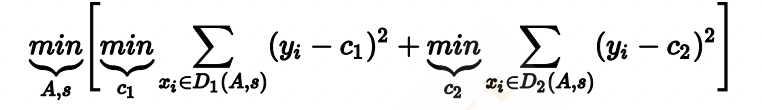
(s is split point, c1,c2 is mean of bisplit LHS/RHS)

2. For prediction, when land to leaf node, use averaging or something similar.

### 5. CART cutting nodes

Since decision tree are likely to get overfit. We need to cut off some nodes. Here is the regularization methods:
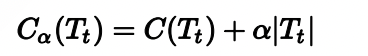 Where |Tt| is the number of nodes in the tree.

---

The formula have the property that:
1. The smaller alpha is, the less important it is to have a small tree, and its likely to have a deep tree.
2. The larger alpha is, the more likely it is to have a small tree.

---

Before cutting the tree with subtree root at t. Loss is:
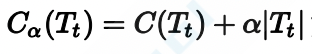
After cutting the tree with subtree root at t. Loss is:
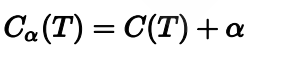

We want to make alpha equal, this alpha is minimum alpha that make it worth it to cut the tree. So the higher the alpha is, the more informative the subtree is and we should probably not cut it off. Vice versa.
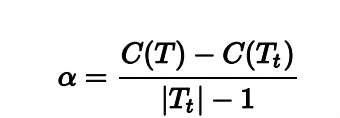

---

Logic of cutting tree:
1. 初始化𝑘=0,𝑇=𝑇0， 最优⼦树集合𝜔={𝑇}。
2. 𝛼𝑚𝑖𝑛=∞
3. 从叶⼦节点开始⾃下⽽上计算各内部节点t的训练误差损失函数𝐶𝛼(𝑇𝑡)（回归树为均⽅差，分类树为基尼系数）, 叶⼦节点数|𝑇𝑡|，以及正则化阈值𝛼=𝑚𝑖𝑛{𝐶(𝑇)−𝐶(𝑇𝑡)|𝑇𝑡|−1,𝛼𝑚𝑖𝑛}, 更新𝛼𝑚𝑖𝑛=𝛼
4. 𝛼𝑘=𝛼𝑚𝑖𝑛。
5. ⾃上⽽下的访问⼦树t的内部节点，如果𝐶(𝑇)−𝐶(𝑇𝑡)|𝑇𝑡|−1≤𝛼𝑘时，进⾏剪枝。并决定叶节点t的值。如果是分类树，则是概率最⾼的类别，如果是回归树，则是所有样本输出的均值。这样得到𝛼𝑘对应的最优⼦树𝑇�
6. 最优⼦树集合𝜔=𝜔∪𝑇𝑘
7. 𝑘=𝑘+1,𝑇=𝑇𝑘, 如果T不是由根节点单独组成的树，则回到步骤2继续递归执⾏。否则就已经得到了所有的可选最优⼦树集合𝜔.
8. 采⽤交叉验证在𝜔选择最优⼦树𝑇𝛼

The idea is to continuous cut tree (which result in a path of cutting, and get the best tree based on cross validation)

### 6. Decision Tree conclusion
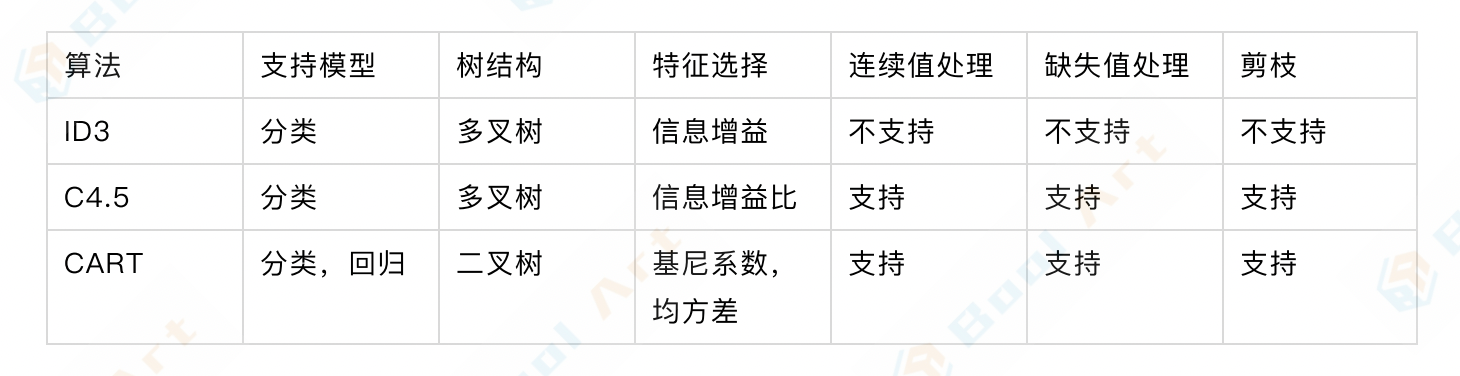

Cons for CART:
1. Tree unstable, change a little bit may change feature selection path which change the tree structure.
2. 但是⼤多数，分类决策不应该是由某⼀个特征决定的，⽽是应该由⼀组特征决定的

Decision tree conclusions:
Pros:
1. 简单直观，⽣成的决策树很直观。
2. 使⽤决策树预测的代价是𝑂(𝑙𝑜𝑔2𝑚)O(log2m)。 m为样本数。
3. 基本不需要预处理，不需要提前归⼀化，处理缺失值。
4. 既可以处理离散值也可以处理连续值。很多算法只是专注于离散值或者连续值。
5. 可以处理多维度输出的分类问题。
6. 相⽐于神经⽹络之类的⿊盒分类模型，决策树在逻辑上可以得到很好的解释
7. 对于异常点的容错能⼒好，健壮性⾼。
Cons:
1. 决策树算法⾮常容易过拟合，导致泛化能⼒不强。可以通过设置节点最少样本数量和限制决策树深度来改进。
2. 决策树会因为样本发⽣⼀点点的改动，就会导致树结构的剧烈改变。这个可以通过集成学习之类的⽅法解决。
3. 寻找最优的决策树是⼀个NP难的问题，我们⼀般是通过启发式⽅法，容易陷⼊局部最优。可以通过集成学习之类的⽅法来改善。
4. 有些⽐较复杂的关系，决策树很难学习，⽐如异或。这个就没有办法了，⼀般这种关系可以换神经⽹络分类⽅法来解决。
5. 如果某些特征的样本⽐例过⼤，⽣成决策树容易偏向于这些特征。这个可以通过调节样本权重来改善。

## Part 3 Bagging/RF/Stacking

### 1. Bagging

The idea is:
1. Randomly sample some elements for training, and then merge all models. Sample data is not exclusive from each other.
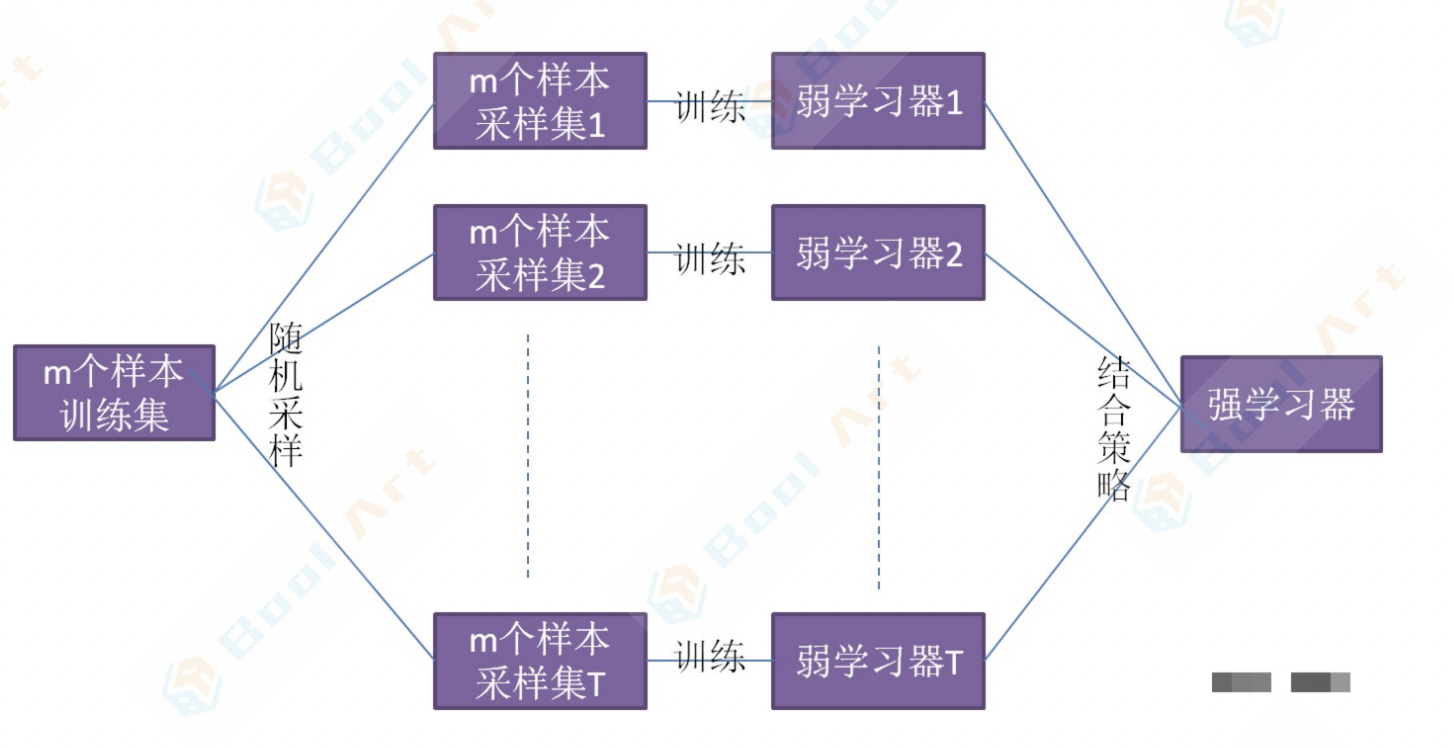

---

2. The probability that one is never selected is (1 - 1/m)^m, which is 1/e = 0.368. 也就是说，在bagging的每轮随机采样中，训练集中⼤约有36.8%的数据没有被采样集采集中。

---

3. 对于这部分⼤约36.8%的没有被采样到的数据，我们常常称之为袋外数据(Out Of Bag, 简称OOB)。这些数据没有参与训练集模型的拟合，因此可以⽤来检测模型的泛化能⼒。

---

4. 由于Bagging算法每次都进⾏采样来训练模型，因此泛化能⼒很强，对于降低模型的⽅差很有作⽤。当然对于训练集的拟合程度就会差⼀些，也就是模型的偏倚会⼤⼀些。(因为数据没用全)

### 2. Random forest

对于普通的决策树，我们会在节点上所有的n个样本特征中选择⼀个最优的特征来做决策树的左右⼦树划分，但是RF通过随机选择节点上的⼀部分样本特征，这个数字⼩于n，假设为𝑛𝑠𝑢𝑏，然后在这些随机选择的𝑛𝑠𝑢𝑏个样本特征中，选择⼀个最优的特征来做决策树的左右⼦树划分。这样进⼀步增强了模型的泛化能⼒。

Bagging --> many tree --> averaging regression/classification voting

### 3. Variations
1. Extra trees: extra trees⽐较的激进，他会随机的选择⼀个特征值来划分决策树(continuous value)。泛化能力更强一点。
2. Totally Ramdom Trees Embedding: 不同的树对同一个值进行输出，从而映射到高维。比如说三树(0,1,0,0,0, 0,0,1,0,0, 0,0,0,0,1)。
3. Isolation forest: 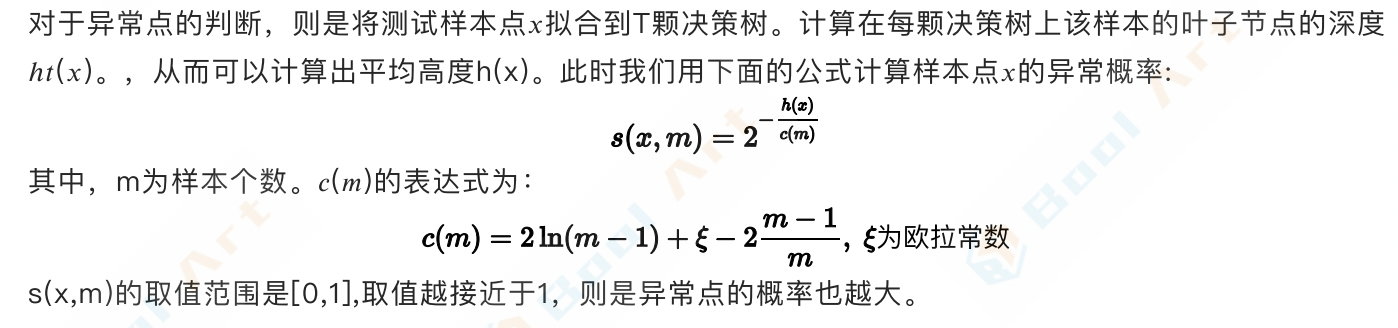

---

Conclusion:
Pros:
1. 训练可以⾼度并⾏化，对于⼤数据时代的⼤样本训练速度有优势。个⼈觉得这是的最主要的优点。
2. 由于可以随机选择决策树节点划分特征，这样在样本特征维度很⾼的时候，仍然能⾼效的训练模型。
3. 在训练后，可以给出各个特征对于输出的重要性
4. 由于采⽤了随机采样，训练出的模型的⽅差⼩，泛化能⼒强。
5. 相对于Boosting系列的Adaboost和GBDT，RF实现⽐较简单。
6. 对部分特征缺失不敏感。

Cons:
1. 在某些噪⾳⽐较⼤的样本集上，RF模型容易陷⼊过拟合。
2. 取值划分⽐较多的特征容易对RF的决策产⽣更⼤的影响，从⽽影响拟合的模型的效果。

### 4. RF Code
`
RandomForestClassifer, RandomForestRegressor, ExtraTressClassifier, ExtraTressRegressor
`
For extra code, check project notebook.

### 5. Stacking

The idea is train some predictors(different ML models) to map it to a new feature space and train based on that. I.e.: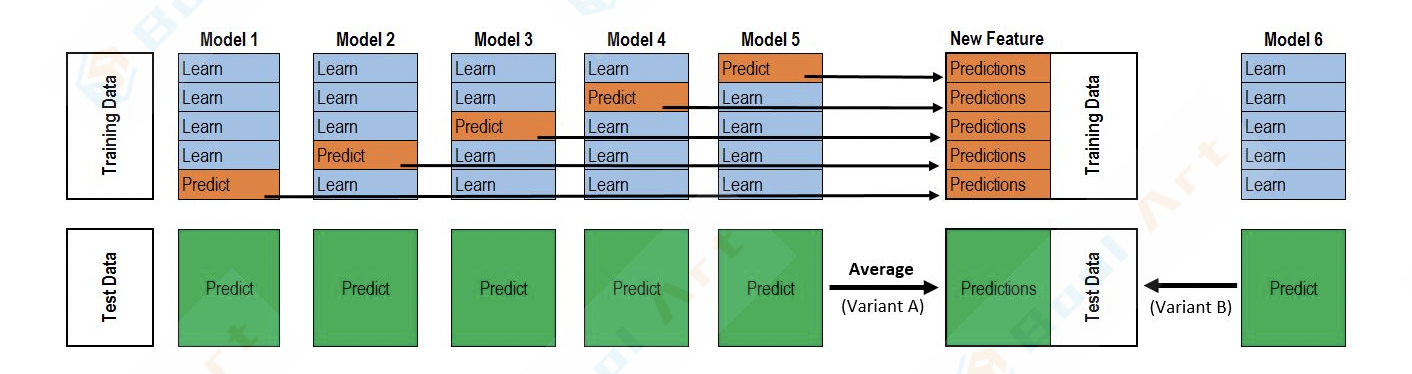

1. For each iteration, Cross-validate some data -> train model/predict feature, the predicted will be used as derieved feature.
2. At the same time, for each iteration, check the predict the whole test data.
3. Finally, merge each predicted train for real train. Average the predicted test data to become the input of test data.